In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

In [2]:
sns.set_context('talk')
rcParams['font.size'] = 18
rcParams['figure.titlesize'] = 'large'

In [3]:
%matplotlib inline

In [35]:
group = 100
delta = '0-05'
sample = 6

meas1 = 'alpha_score'
meas2 = 'chord_arc_infinity'
measure_one = '$\\alpha$ fatness'
measure_two = 'Arc $L_\infty$'

input_dir = f'../data/input/mitchell_polygons/{group}/'
output_dir =f'../data/output/mitchell_polygons/{group}/'

u_meas_1_scores = pd.read_csv(output_dir + f'u_{meas1}.csv')
u_meas_2_scores = pd.read_csv(output_dir + f'u_{meas2}.csv')

u_polygons = []
for i in range(1,11):
    u_polygons.append(Polygon(np.loadtxt(input_dir +  '{}.poly'.format(i), skiprows=1)))

u_meas_1_scores['Polygon'] = u_polygons
    
unsmoothed = u_meas_2_scores.set_index('n').join(u_meas_1_scores.set_index('n'), lsuffix=f' {measure_two}', rsuffix=f' {measure_one}').iloc[:sample]

u_fine_asorted = unsmoothed.sort_values(f'0.05 {measure_one}',ascending=True)[[f'0.05 {measure_two}', f'0.05 {measure_one}', 'Polygon']]
u_fine_csorted = unsmoothed.sort_values(f'0.05 {measure_two}',ascending=False)[[f'0.05 {measure_two}', 'Polygon']]

In [40]:
p = u_fine_asorted['Polygon'].iloc[0]

In [43]:
p.get_xy()

array([[ 0.05884856,  0.34061678],
       [ 0.0628265 ,  0.01325639],
       [ 0.20864917,  0.00506844],
       [ 0.59053046,  0.04954875],
       [ 0.72651869,  0.02667744],
       [ 0.67531085,  0.0165273 ],
       [ 0.8453384 ,  0.05003422],
       [ 0.92357549,  0.14341025],
       [ 0.99257296,  0.50512549],
       [ 0.86174407,  0.27250419],
       [ 0.85515567,  0.3244009 ],
       [ 0.85762607,  0.20922947],
       [ 0.81887334,  0.25693679],
       [ 0.85348609,  0.44881318],
       [ 0.98497   ,  0.66875192],
       [ 0.93985897,  0.76406141],
       [ 0.97845186,  0.89114994],
       [ 0.9799747 ,  0.9497522 ],
       [ 0.81722014,  0.79860147],
       [ 0.76928177,  0.8948245 ],
       [ 0.56606007,  0.79042062],
       [ 0.56127393,  0.60082608],
       [ 0.68631457,  0.68425991],
       [ 0.64371424,  0.76941194],
       [ 0.67094699,  0.82519763],
       [ 0.70663537,  0.83919435],
       [ 0.75893436,  0.7415522 ],
       [ 0.85006698,  0.64538356],
       [ 0.86205332,

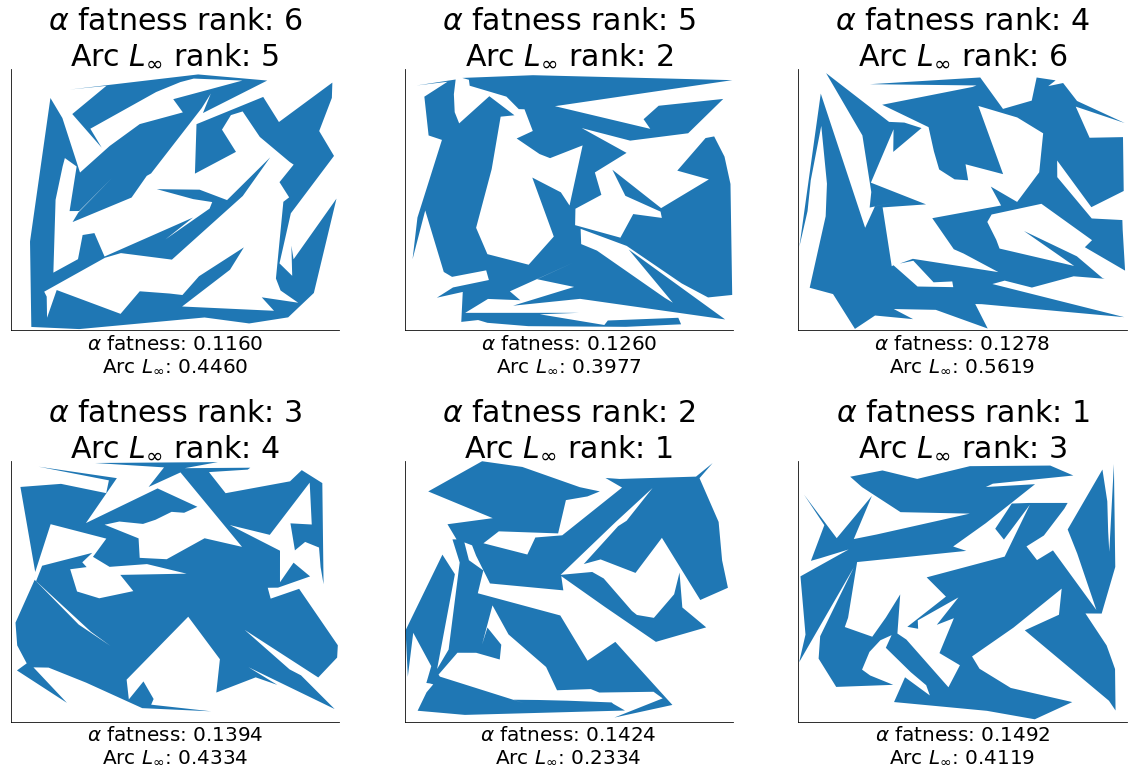

In [36]:
fig_u, axes_u = plt.subplots(2,3,figsize=(20,12))
for (i, ax) in enumerate(axes_u.reshape(6,)):
    m1_rank = i
    polygon_name = u_fine_asorted.iloc[i].name
    m2_rank = u_fine_csorted.index.get_loc(u_fine_asorted.iloc[i].name)
    p = PatchCollection([u_fine_asorted['Polygon'].iloc[i]])
    ax.add_collection(p)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_title(f'{measure_one} rank: {sample - m1_rank}\n{measure_two} rank: {sample - m2_rank}', fontsize=30)
    ax.set_xlabel(f'{measure_one}: {(u_fine_asorted[f"0.05 {measure_one}"].iloc[i]):.4f}\n{measure_two}: {(u_fine_asorted[f"0.05 {measure_two}"].iloc[i]):.4f}', fontsize=20)
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=0.5)
    
fig_u.savefig(f'../plots/u_{group}_{meas1}_{meas2}_vertices_{delta}_delta_ranking.eps', bbox_inches='tight')

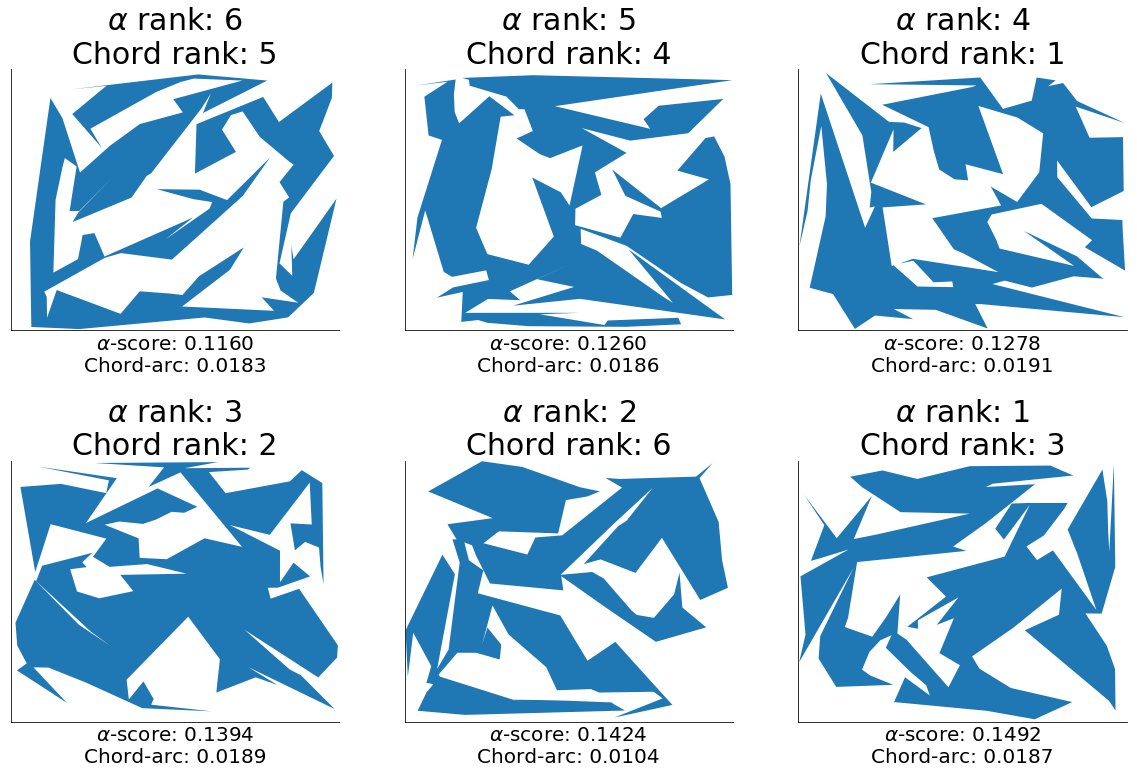

In [9]:
fig_u, axes_u = plt.subplots(2,3,figsize=(20,12))
for (i, ax) in enumerate(axes_u.reshape(6,)):
    alpha_rank = i
    polygon_name = u_fine_asorted.iloc[i].name
    chord_rank = u_fine_csorted.index.get_loc(u_fine_asorted.iloc[i].name)
    p = PatchCollection([u_fine_asorted['Polygon'].iloc[i]])
    ax.add_collection(p)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_title(f'$\\alpha$ rank: {sample - alpha_rank}\nChord rank: {sample - chord_rank}', fontsize=30)
    ax.set_xlabel('$\\alpha$-score: {:.4f}\nChord-arc: {:.4f}'.format(u_fine_asorted['0.05 (alpha score)'].iloc[i], 
                                                                       u_fine_asorted['0.05 (chord arc)'].iloc[i]), fontsize=20)
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=0.5)
    
fig_u.savefig(f'../plots/u_{group}_vertices_{delta}_delta_ranking.eps', bbox_inches='tight')

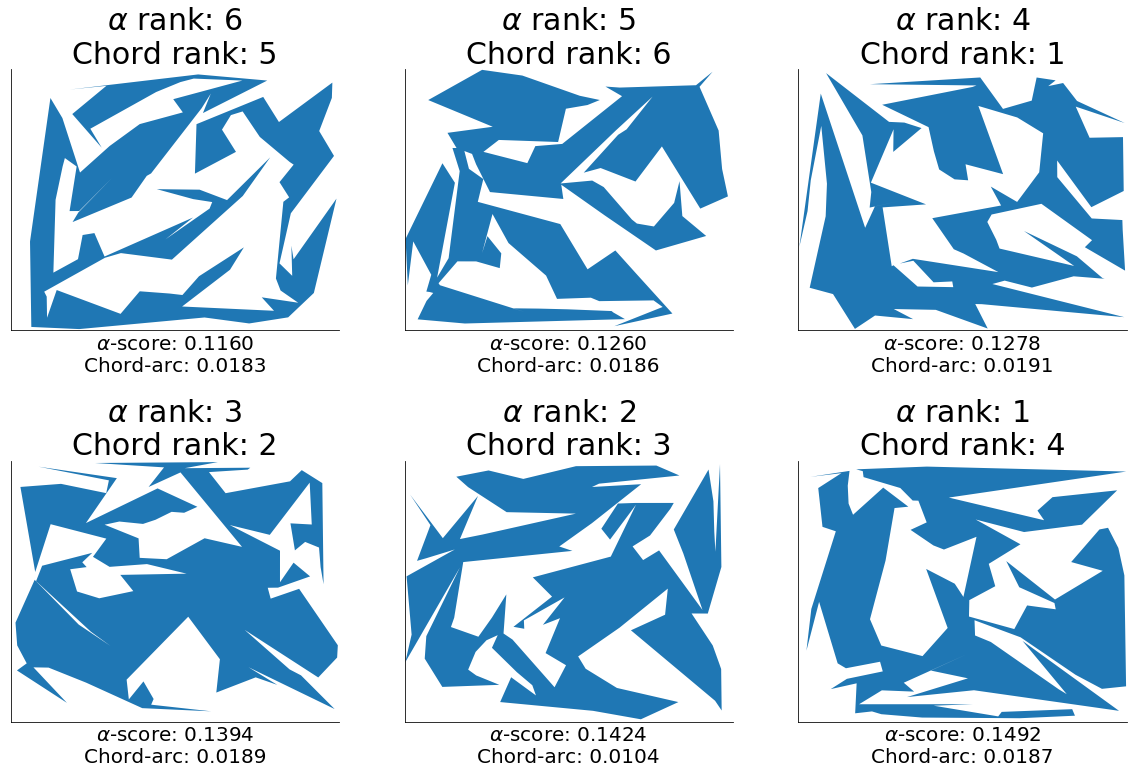

In [10]:
fig_s, axes_s = plt.subplots(2,3,figsize=(20,12))
for (i, ax) in enumerate(axes_s.reshape(6,)):
    alpha_rank = i
    polygon_name = s_fine_asorted.iloc[i].name
    chord_rank = s_fine_csorted.index.get_loc(s_fine_asorted.iloc[i].name)
    p = PatchCollection([s_fine_asorted['Polygon'].iloc[i]])
    ax.add_collection(p)
    ax.get_yaxis().set_visible(False)
    ax.set_xticks([])
    ax.set_title(f'$\\alpha$ rank: {sample - alpha_rank}\nChord rank: {sample - chord_rank}', fontsize=30)
    ax.set_xlabel('$\\alpha$-score: {:.4f}\nChord-arc: {:.4f}'.format(u_fine_asorted['0.05 (alpha score)'].iloc[i], 
                                                                       u_fine_asorted['0.05 (chord arc)'].iloc[i]), fontsize=20)
    sns.despine(ax=ax)
    
plt.subplots_adjust(hspace=0.5)
    
fig_u.savefig(f'../plots/s_{group}_vertices_{delta}_delta_ranking.eps', bbox_inches='tight')